In [1]:
library(correlation)
library(corrplot)
library(Hmisc)
library(psych)
library(MASS)


Warning message:
"package 'correlation' was built under R version 4.2.2"
Warning message:
"package 'corrplot' was built under R version 4.2.2"
corrplot 0.92 loaded

Warning message:
"package 'Hmisc' was built under R version 4.2.2"
Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.2"

Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units


Warning message:
"package 'psych' was built under R version 4.2.2"

Attaching package: 'psych'


The following object is masked from 'package:Hmisc':

    describe


The following objects are masked from 'package:ggplot2':

    %+%, alpha


Warning message:
"package 'MASS' was built under R version 4.2.2"


In [2]:
lineardata <- read.csv("kc_house_data.csv", stringsAsFactors = FALSE)
summary(lineardata)


       id                date               price            bedrooms     
 Min.   :1.000e+06   Length:21613       Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   Class :character   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   Mode  :character   Median : 450000   Median : 3.000  
 Mean   :4.580e+09                      Mean   : 540182   Mean   : 3.371  
 3rd Qu.:7.309e+09                      3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09                      Max.   :7700000   Max.   :33.000  
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688   3rd Qu.:2.000  
 Max.   :8.000   Max.   :13540   Max.   :1651359   Max.   :3.500  
   wat

In [3]:
str( lineardata )

'data.frame':	21613 obs. of  21 variables:
 $ id           : num  7.13e+09 6.41e+09 5.63e+09 2.49e+09 1.95e+09 ...
 $ date         : chr  "20141013T000000" "20141209T000000" "20150225T000000" "20141209T000000" ...
 $ price        : num  221900 538000 180000 604000 510000 ...
 $ bedrooms     : int  3 3 2 4 3 4 3 3 3 3 ...
 $ bathrooms    : num  1 2.25 1 3 2 4.5 2.25 1.5 1 2.5 ...
 $ sqft_living  : int  1180 2570 770 1960 1680 5420 1715 1060 1780 1890 ...
 $ sqft_lot     : int  5650 7242 10000 5000 8080 101930 6819 9711 7470 6560 ...
 $ floors       : num  1 2 1 1 1 1 2 1 1 2 ...
 $ waterfront   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ view         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ condition    : int  3 3 3 5 3 3 3 3 3 3 ...
 $ grade        : int  7 7 6 7 8 11 7 7 7 7 ...
 $ sqft_above   : int  1180 2170 770 1050 1680 3890 1715 1060 1050 1890 ...
 $ sqft_basement: int  0 400 0 910 0 1530 0 0 730 0 ...
 $ yr_built     : int  1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 ...
 $ yr_renovated :

In [4]:
head(lineardata)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,7237550310,20140512T000000,1230000,4,4.50,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [5]:
tail(lineardata)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
21608,2997800021,20150219T000000,475000,3,2.50,1310,1294,2,0,0,⋯,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21609,263000018,20140521T000000,360000,3,2.50,1530,1131,3,0,0,⋯,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21610,6600060120,20150223T000000,400000,4,2.50,2310,5813,2,0,0,⋯,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21611,1523300141,20140623T000000,402101,2,0.75,1020,1350,2,0,0,⋯,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21612,291310100,20150116T000000,400000,3,2.50,1600,2388,2,0,0,⋯,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21613,1523300157,20141015T000000,325000,2,0.75,1020,1076,2,0,0,⋯,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
nrow(lineardata)


[1] 21613

In [7]:
lineardata$id<-NULL
lineardata$date<-NULL
lineardata

price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
1230000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
257500,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
291850,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
229500,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113


In [8]:
NAindata<-sum(is.na(lineardata))
NAindata

[1] 0

In [9]:
cor(lineardata[,-20])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.00000000,0.308338369,0.52513407,0.70204372,0.089655208,0.256785705,0.266330511,0.397346474,0.036391921,0.66746274,0.6055655067,0.32383736,0.05398183,0.126442229,-0.053168199,0.3069187697,0.02157079,0.585374006,0.082455546
bedrooms,0.30833837,1.000000000,0.51588364,0.57667069,0.031703243,0.175428935,-0.006582479,0.079531852,0.028472104,0.35696673,0.4776001614,0.30309338,0.15417807,0.018840823,-0.152668487,-0.0089310097,0.12947298,0.391637524,0.029244224
bathrooms,0.52513407,0.515883638,1.00000000,0.75466528,0.087739662,0.500653173,0.063743629,0.187737024,-0.124981933,0.66498253,0.6853424759,0.28377003,0.50601944,0.050738978,-0.203866274,0.0245729528,0.22304184,0.568634290,0.087175361
sqft_living,0.70204372,0.576670693,0.75466528,1.00000000,0.172825661,0.353949290,0.103817818,0.284611186,-0.058752587,0.76270448,0.8765965987,0.43504297,0.31804877,0.055362927,-0.199430043,0.0525294622,0.24022330,0.756420259,0.183285551
sqft_lot,0.08965521,0.031703243,0.08773966,0.17282566,1.000000000,-0.005200991,0.021603683,0.074710106,-0.008958250,0.11362112,0.1835122809,0.01528620,0.05308037,0.007643505,-0.129574486,-0.0856827882,0.22952086,0.144608174,0.718556752
floors,0.25678570,0.175428935,0.50065317,0.35394929,-0.005200991,1.000000000,0.023698320,0.029443820,-0.263767946,0.45818251,0.5238847103,-0.24570454,0.48931942,0.006338401,-0.059120642,0.0496141310,0.12541903,0.279885265,-0.011269187
waterfront,0.26633051,-0.006582479,0.06374363,0.10381782,0.021603683,0.023698320,1.000000000,0.401857351,0.016653157,0.08277491,0.0720745917,0.08058794,-0.02616109,0.092884837,0.030284728,-0.0142737756,-0.04191020,0.086463136,0.030703283
view,0.39734647,0.079531852,0.18773702,0.28461119,0.074710106,0.029443820,0.401857351,1.000000000,0.045989737,0.25132058,0.1676493441,0.27694658,-0.05343985,0.103917288,0.084826917,0.0061567321,-0.07839971,0.280439082,0.072574568
condition,0.03639192,0.028472104,-0.12498193,-0.05875259,-0.008958250,-0.263767946,0.016653157,0.045989737,1.000000000,-0.14467367,-0.1582136164,0.17410491,-0.36141656,-0.060617787,0.003025524,-0.0149410064,-0.10650045,-0.092824268,-0.003405523
grade,0.66746274,0.356966725,0.66498253,0.76270448,0.113621124,0.458182514,0.082774914,0.251320585,-0.144673671,1.00000000,0.7559229376,0.16839182,0.44696320,0.014414281,-0.184862093,0.1140840571,0.19837215,0.713202093,0.119247897


In [10]:
set.seed(205)

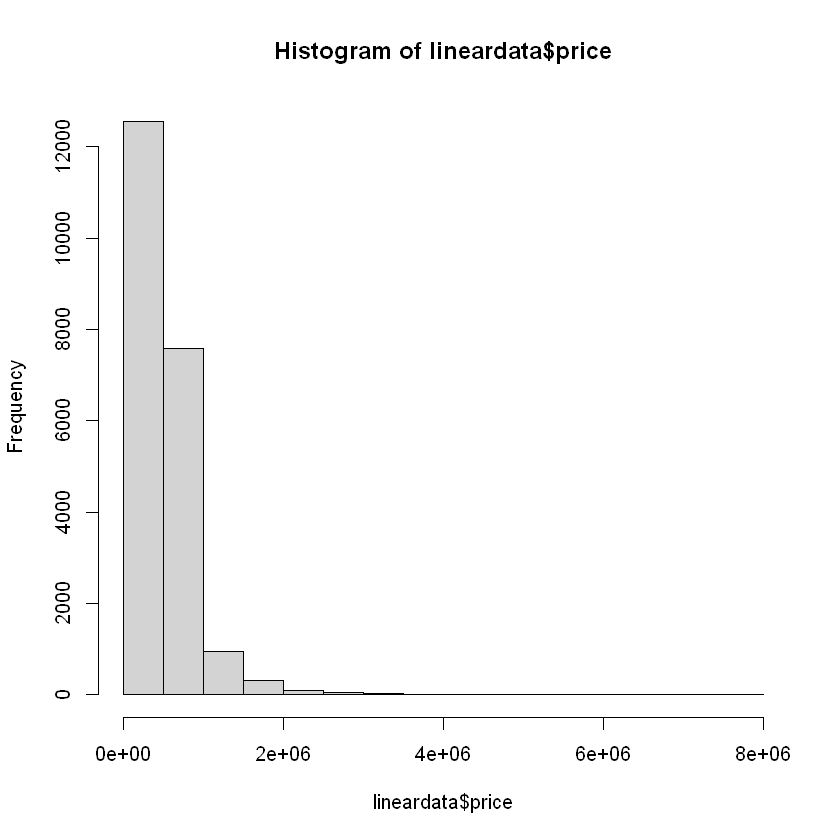

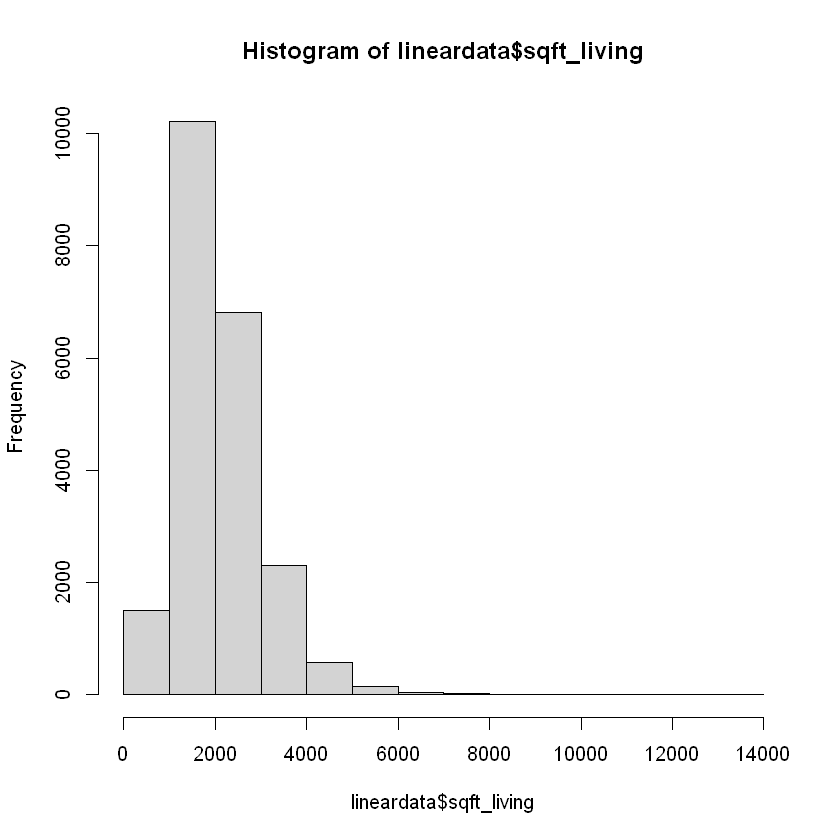

In [11]:
hist(lineardata$price)
hist(lineardata$sqft_living)

In [12]:

train_index <- sample(nrow(lineardata), size = round(0.70 * nrow(lineardata)), replace = FALSE)
train <- lineardata[train_index,]
test <- lineardata[-train_index,]

In [13]:
lm<-lm(price~ sqft_living, data=train)
summary(lm)


Call:
lm(formula = price ~ sqft_living, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1452524  -146735   -25289   106983  4382520 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -39089.924   5243.368  -7.455 9.47e-14 ***
sqft_living    278.553      2.303 120.959  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 262300 on 15127 degrees of freedom
Multiple R-squared:  0.4917,	Adjusted R-squared:  0.4916 
F-statistic: 1.463e+04 on 1 and 15127 DF,  p-value: < 2.2e-16


In [ ]:
par(mfrow=c(2,2))
plot(lm)

In [ ]:
normalize <- function(x) { return ((x - min(x)) / (max(x) - min(x))) }

In [ ]:

normalize(c(1, 2, 3, 4, 5))
normalize(c(10, 20, 30, 40, 50))

In [ ]:
housingnorm<- as.data.frame(lapply(lineardata[1:19], normalize))


In [ ]:
fitnorm<-lm(price ~ sqft_living,data=train)

In [ ]:
summary(fitnorm)
plot(fitnorm)

In [ ]:
refitnorm3<-lm(log(price) ~ log(sqft_living), data=train)
par(mfrow=c(2,2))
plot(refitnorm3)

In [ ]:
summary(refitnorm3)

In [ ]:
xtab<- data.frame(exp(refitnorm3$fitted.values), train$price)

1-mean(abs(xtab$train.price - xtab$exp.refitnorm3.fitted.values)/xtab$train.price)

In [ ]:

train.corr<-round(cor(xtab$exp.refitnorm3.fitted.values,xtab$train.price),2)
train.corr

In [ ]:
sample.RMSE<-round(sqrt(mean((xtab$exp.refitnorm3.fitted.values-xtab$train.price)^2)))
sample.RMSE

In [ ]:
train.MAE<-round(mean(abs(xtab$exp.refitnorm3.fitted.values-xtab$train.price)))
train.MAE